<div style="color: white;padding-top:18px;text-align:center;background-color:#610C9F;border-radius:15px;border: 1px solid white;"> 
    <h3>Exercise 24 (score:350
    )</h3>
</div>

<div style="color: white;padding-top:18px;text-align:left;background-color:#940B92;border-radius:15px;border: 1px solid white;"> 
    <h4>Question 01 (Database):</h4>
    <p> Create a relational database for a university system that includes three tables: Students,
Courses, and Enrollments. The database should track the students, the courses offered, and
the enrollments of students in these courses.
</p>
</div>

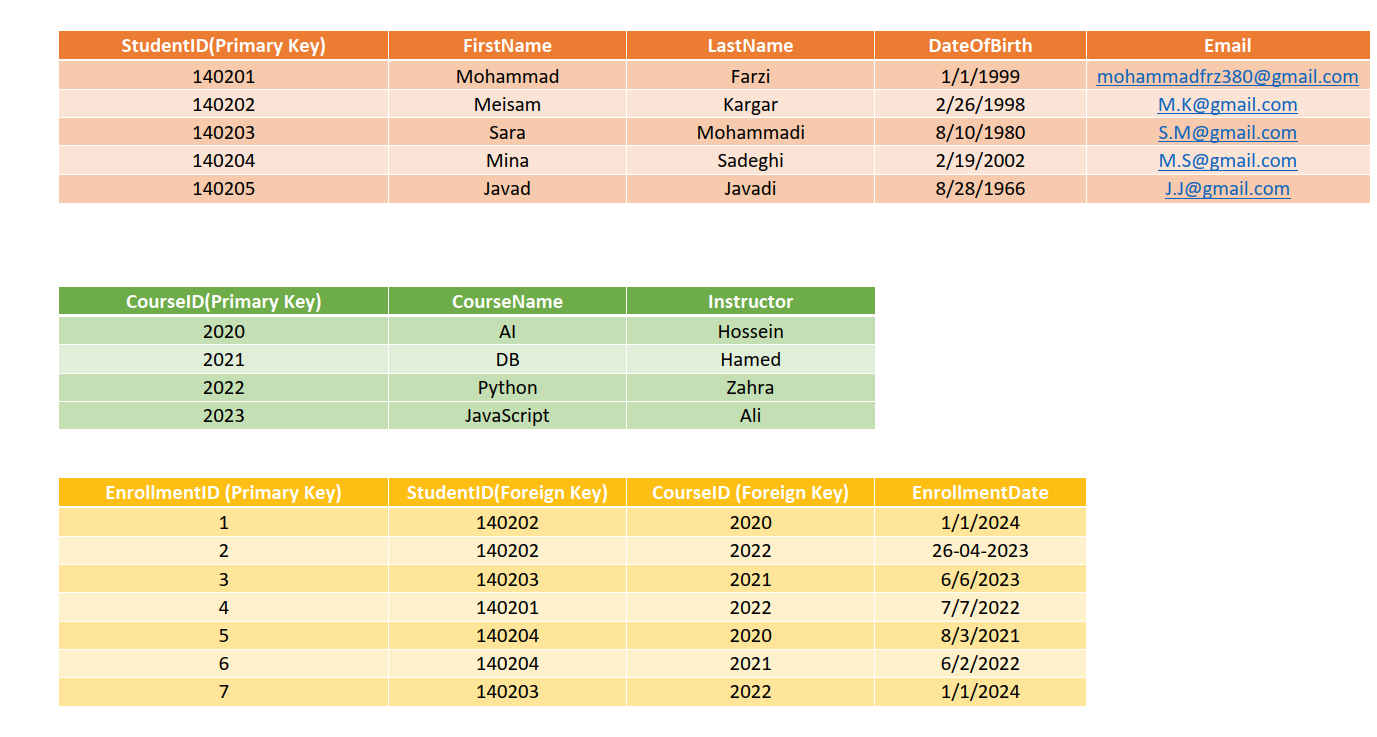

# 1-Data Insertion

In [ ]:
USE University;

# 2. Querying Student Enrollments

# 3. Data Removal

# 4. Updating Course Names

<div style="color: white;padding-top:18px;text-align:left;background-color:#940B92;border-radius:15px;border: 1px solid white;"> 
    <h4>Question 02 (Databas)</h4>
<p>
Write question 24 by mysql.connector library.
</p>


In [1]:
import mysql.connector

In [2]:
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "MohammadMohammad",
)

In [3]:
cursor = mydb.cursor()

# 1- Create and Data Insertion

In [4]:
sql1 = "CREATE DATABASE UNIVERSITY2"

In [5]:
cursor.execute(sql1)

In [6]:
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "MohammadMohammad",    
    database = "University2"
)
cursor = mydb.cursor()

In [7]:
table_1 = """CREATE TABLE Students(
    StudentID int NOT NULL,
    FirstName VARCHAR(30) NOT NULL,
    LASTNAME VARCHAR(30) NOT NULL,
    DATEOFBIRTH DATE,
    EMAIL VARCHAR(255),
    PRIMARY KEY (StudentID)
);"""

table_2 = """CREATE TABLE Courses(
    CourseID int NOT NULL,
    CourseName VARCHAR(255) NOT NULL,
    INSTRUCTOR VARCHAR(255) NOT NULL,
    PRIMARY KEY (CourseID)
);"""

table_3 = """CREATE TABLE Enrollments(
    EnrollmentID int NOT NULL AUTO_INCREMENT,
    StudentID int NOT NULL,
    CourseID int NOT NULL,
    EnrollmentDate DATE,
    PRIMARY KEY (EnrollmentID),
    FOREIGN KEY (StudentID) REFERENCES Students(StudentID),
    FOREIGN KEY (CourseID) REFERENCES Courses(CourseID)
);"""

insert_1 = """INSERT INTO Students (StudentID, FirstName, LASTNAME, DATEOFBIRTH, Email) 
    VALUES 
        (140201,"Mohammad","Farzi",'1999-1-1',"Mohammadfrz380@gmail.com"), 
        (140202,"Meisam","Kargar",'1998-2-26',"M.K@gmail.com"), 
        (140203,"Sara","Mohammadi",'1980-8-10',"S.M@gmail.com"),
        (140204,"Mina","Sadeghi",'2002-2-19',"M.S@gmail.com"),
        (140205,"Javad","Javadi",'1966-8-28',"J.J@gmail.com");"""


insert_2 ="""INSERT INTO Courses (CourseID, CourseName, Instructor) 
    VALUES 
        (2020,"AI","Hossein"), 
        (2021,"DB","Hamed"), 
        (2022,"Python","Zahra"),
        (2023,"JavaScript","Ali");"""


insert_3 = """INSERT INTO Enrollments (StudentID, CourseID, EnrollmentDate) 
    VALUES 
        (140202,2020,"2024-01-01"),
        (140202,2022,"2023-04-26"),
        (140203,2021,"2023-06-06"),
        (140201,2022,"2023-07-07"),
        (140204,2020,"2021-08-03"),
        (140204,2021,"2022-06-02"),
        (140203,2022,"2024-01-01");"""

sql_commands = [table_1, table_2, table_3,insert_1,insert_2,insert_3]

for command in sql_commands:
    cursor.execute(command, multi=True)
mydb.commit()

In [8]:
cursor.execute("show tables;")
cursor.fetchall()

[('courses',), ('enrollments',), ('students',)]

# 2 - Querying Student Enrollments

In [9]:
cursor.execute("select firstname, count(CourseID) as Total from Students INNER JOIN ENrollments ON Students.studentid = enrollments.studentid GROUP BY Students.StudentID;")

In [10]:
cursor.fetchall()

[('Mohammad', 1), ('Meisam', 2), ('Sara', 2), ('Mina', 2)]

# 3. Data Removal

In [11]:
remove_1 = """DELETE FROM Enrollments
WHERE StudentID IN (
    SELECT StudentID
    FROM (
        SELECT e.StudentID
        FROM Enrollments e
        GROUP BY e.StudentID
        HAVING COUNT(e.CourseID) < 2
    ) AS SubQuery
);"""

remove_2 = """DELETE FROM Students
WHERE StudentID NOT IN (
    SELECT StudentID FROM Enrollments
);"""

cursor.execute(remove_1)
cursor.execute(remove_2)

In [12]:
cursor.execute("Select * from enrollments;")
cursor.fetchall()

[(1, 140202, 2020, datetime.date(2024, 1, 1)),
 (2, 140202, 2022, datetime.date(2023, 4, 26)),
 (3, 140203, 2021, datetime.date(2023, 6, 6)),
 (5, 140204, 2020, datetime.date(2021, 8, 3)),
 (6, 140204, 2021, datetime.date(2022, 6, 2)),
 (7, 140203, 2022, datetime.date(2024, 1, 1))]

In [13]:
cursor.execute("Select * from Students;")
cursor.fetchall()

[(140202, 'Meisam', 'Kargar', datetime.date(1998, 2, 26), 'M.K@gmail.com'),
 (140203, 'Sara', 'Mohammadi', datetime.date(1980, 8, 10), 'S.M@gmail.com'),
 (140204, 'Mina', 'Sadeghi', datetime.date(2002, 2, 19), 'M.S@gmail.com')]

# 4. Updating Course Names

In [14]:
cursor.execute("UPDATE Courses set CourseName = 'Python' WHERE CourseName Like '%Java%'")

In [ ]:
# UPDATE Courses set CourseName = REPLACE(CourseName, 'Java', 'Python') WHERE CourseName Like "%Java%"

In [15]:
cursor.execute("select * from courses;")
cursor.fetchall()

[(2020, 'AI', 'Hossein'),
 (2021, 'DB', 'Hamed'),
 (2022, 'Python', 'Zahra'),
 (2023, 'Python', 'Ali')]

# Close Cursor and mydb

In [16]:
cursor.close()
mydb.close()

In [17]:
cursor.execute("Show tables;")

ProgrammingError: 2055: Cursor is not connected